# Identificando frequência das palavras-chave

In [1]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output
import nltk
import re
from collections import defaultdict, Counter
from string import punctuation

#stopwords em portugues
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese') + list(punctuation) + ['“','”'])

#funçao pra limpeza de texto
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

#### Lendo CSV e limpando colunas

In [2]:
tweetsDF = pd.read_csv('out.csv')

In [3]:
tweetsDF = tweetsDF[['text', 'Day']]

In [4]:
tweetsDF.to_csv('clean.csv', index=True)

In [5]:
tweets = tweetsDF

#### Função para tokenizar strings

In [6]:
# funçao pra limpar texto e retirar stopwords
def tokenizar_texto(texto_tweet):
    texto_tokenizado = tweet_tokenizer.tokenize(texto_tweet)

    if texto_tokenizado[0] == "rt" and texto_tokenizado[1] == ":":
        del texto_tokenizado[0]
    
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado if palavra not in stopwords] 
    return palavras_sem_stopwords

#### Tokenizando a coluna 'text'

In [7]:
tweets['text'] = tweets['text'].apply(lambda x: tokenizar_texto(x))

In [8]:
tweets = tweets.groupby('Day').sum()

In [9]:
tweets.head()

,text
Day,
2020-04-11,"[efeitos, quarentena, kkk, quarentena, acabou,..."
2020-04-12,"[existem, 5, opções, vc, vai, sair, dessa, qua..."
2020-04-13,"[nunca, imaginei, acompanharia, bbb, tanto, af..."
2020-04-14,"[dizia, deus, maior, vírus, queria, lote, igre..."
2020-04-15,"[olá, venho, meio, deste, pedir, vc, 41,33, vo..."


# Avaliando frequência das palavras-chave escolhidas em cada dia

In [10]:
days = tweets.index.tolist()

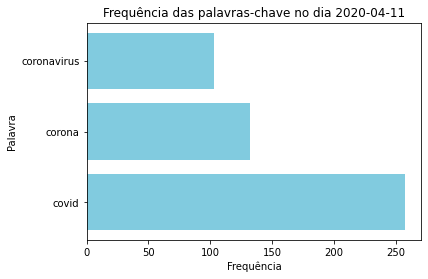

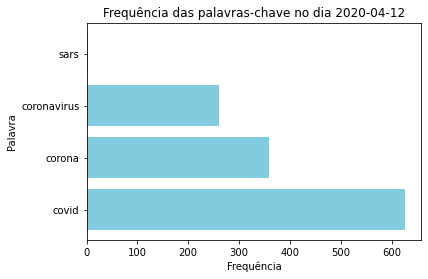

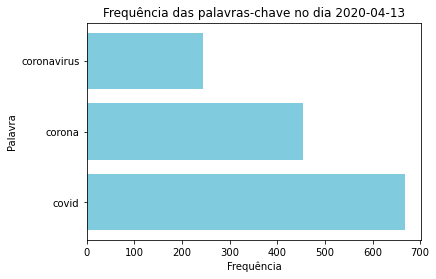

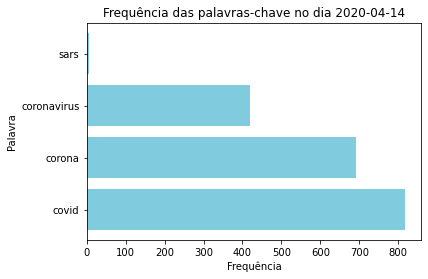

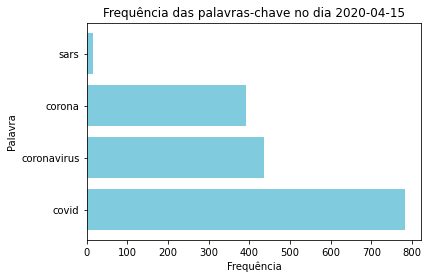

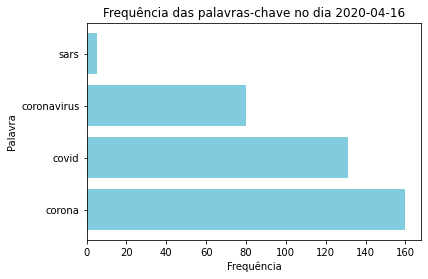

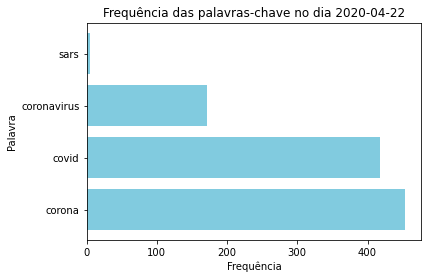

In [11]:
for day in days:
    keywords = ['corona', 'covid', 'coronavirus', 'covid19', 'covid-19', 'sars', 'coronavírus']
    i = days.index(day)
    frequency = Counter(tweets['text'][i])
    frequency = {k: v for k, v in frequency.items() if k in keywords}
    frequency['coronavirus'] += frequency.get('coronavírus')
    del frequency['coronavírus']
    
    frequency = pd.DataFrame.from_dict(frequency, orient='index')
    
    frequency['freq'] = frequency[0]
    frequency = frequency.drop(columns = 0)
    frequency = frequency.sort_values(by='freq', ascending = False)
    
    top5 = frequency.index[:5].tolist() # Lista com as 10 palavras mais frequentes
    freq_top5 = frequency['freq'][:5].tolist() # Lista com a frequência dessas palavras
    
    plt.barh(top5, freq_top5, color=(129/255, 203/255, 223/255, 1))
    plt.title('Frequência das palavras-chave no dia ' + day)
    plt.xlabel('Frequência')
    plt.ylabel('Palavra')
    plt.show()

In [12]:
tweets.head()

,text
Day,
2020-04-11,"[efeitos, quarentena, kkk, quarentena, acabou,..."
2020-04-12,"[existem, 5, opções, vc, vai, sair, dessa, qua..."
2020-04-13,"[nunca, imaginei, acompanharia, bbb, tanto, af..."
2020-04-14,"[dizia, deus, maior, vírus, queria, lote, igre..."
2020-04-15,"[olá, venho, meio, deste, pedir, vc, 41,33, vo..."


In [13]:
def freq(wordlist):
    wordlist = Counter(wordlist)
    wordlist = {k: v for k, v in wordlist.items() if k in keywords}
    wordlist['coronavirus'] += wordlist.get('coronavírus')
    del wordlist['coronavírus']
    
    return wordlist

In [14]:
tweets['text'] = tweets['text'].apply(lambda x: freq(x))

In [15]:
tweets.head()

,text
Day,
2020-04-11,"{'corona': 132, 'covid': 258, 'coronavirus': 103}"
2020-04-12,"{'corona': 359, 'covid': 627, 'coronavirus': 2..."
2020-04-13,"{'covid': 669, 'corona': 455, 'coronavirus': 245}"
2020-04-14,"{'corona': 691, 'covid': 818, 'coronavirus': 4..."
2020-04-15,"{'covid': 784, 'coronavirus': 436, 'corona': 3..."


In [16]:
for i in range(len(tweets)):
    lista = []
    for key in tweets['text'][i]:
        if key not in lista:
            print(key)
            lista.append(key)
            tweets[key] = 0
    

corona
covid
coronavirus
corona
covid
coronavirus
sars
covid
corona
coronavirus
corona
covid
coronavirus
sars
covid
coronavirus
corona
sars
covid
corona
coronavirus
sars
covid
coronavirus
corona
sars


In [17]:
tweets.head()

,text,corona,covid,coronavirus,sars
Day,,,,,
2020-04-11,"{'corona': 132, 'covid': 258, 'coronavirus': 103}",0,0,0,0
2020-04-12,"{'corona': 359, 'covid': 627, 'coronavirus': 2...",0,0,0,0
2020-04-13,"{'covid': 669, 'corona': 455, 'coronavirus': 245}",0,0,0,0
2020-04-14,"{'corona': 691, 'covid': 818, 'coronavirus': 4...",0,0,0,0
2020-04-15,"{'covid': 784, 'coronavirus': 436, 'corona': 3...",0,0,0,0


In [18]:
for column in tweets.columns:
    for i in range(len(tweets)):
        for key in tweets['text'][i]:
            tweets[key][i] = tweets['text'][i][key]

<ipython-input-18-406fd4c06bb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[key][i] = tweets['text'][i][key]


In [19]:
tweets = tweets.drop(columns='text')

In [20]:
tweets.head()

,corona,covid,coronavirus,sars
Day,,,,
2020-04-11,132,258,103,0
2020-04-12,359,627,260,3
2020-04-13,455,669,245,0
2020-04-14,691,818,419,5
2020-04-15,391,784,436,15


In [21]:
tweets.to_csv('frequency.csv', sep=';')